# Time series comparison (UNGL, PANGA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import gpstools as gps

# Silence pandas set with copy warnings
#import warnings; warnings.simplefilter('ignore')

In [2]:
gps.__version__

'0.1.dev52+ge502589.d20230622'

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

# Load time series

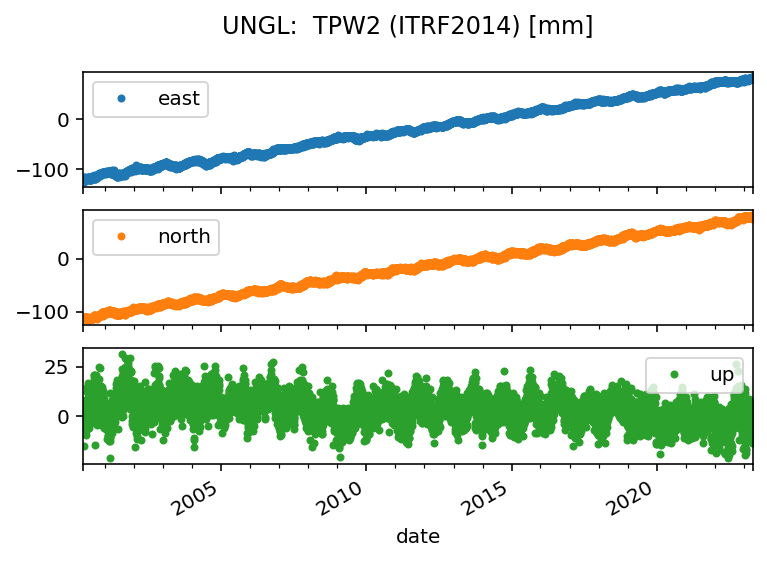

In [4]:
# We'll use station TPW2
station = 'TPW2'
ref1 = 'ITRF2014'
# Reference frame is ITRF2014 (https://www.geodesy.cwu.edu/data/bysite/readme.html)
# Download data
gps.io.panga.download_data(station,overwrite=True)
# Load the timeseries as pandas dataframe
df1 = gps.io.panga.load_panga(station)
title1 = 'UNGL:  {} ({}) [mm]'.format(station, ref1)
axes = df1.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=title1)

Overwriting TPW2


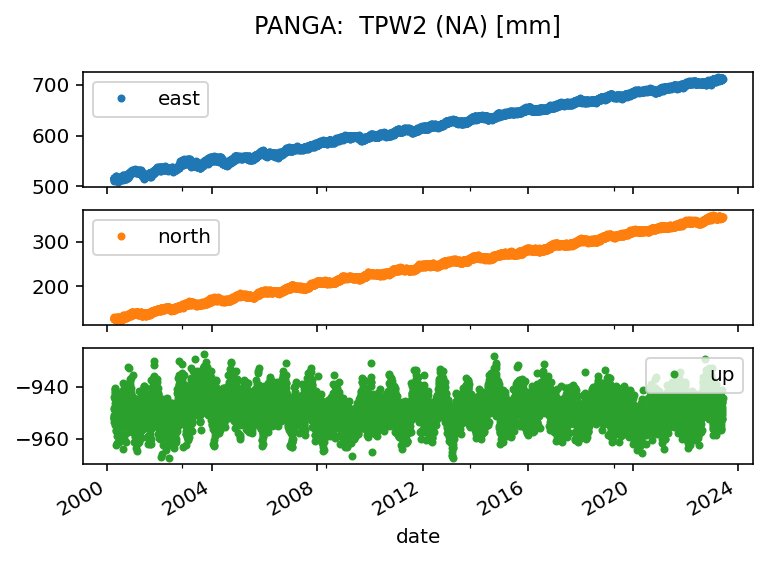

In [5]:
# Load UNGL
ref2= 'NA'
# Download data
tenv3 = gps.io.ungl.download_data(station, ref2, overwrite=True)
df2 = gps.io.ungl.load_tenv3(tenv3)
title2 = 'PANGA:  {} ({}) [mm]'.format(station, ref2)
axes = df2.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=title2)

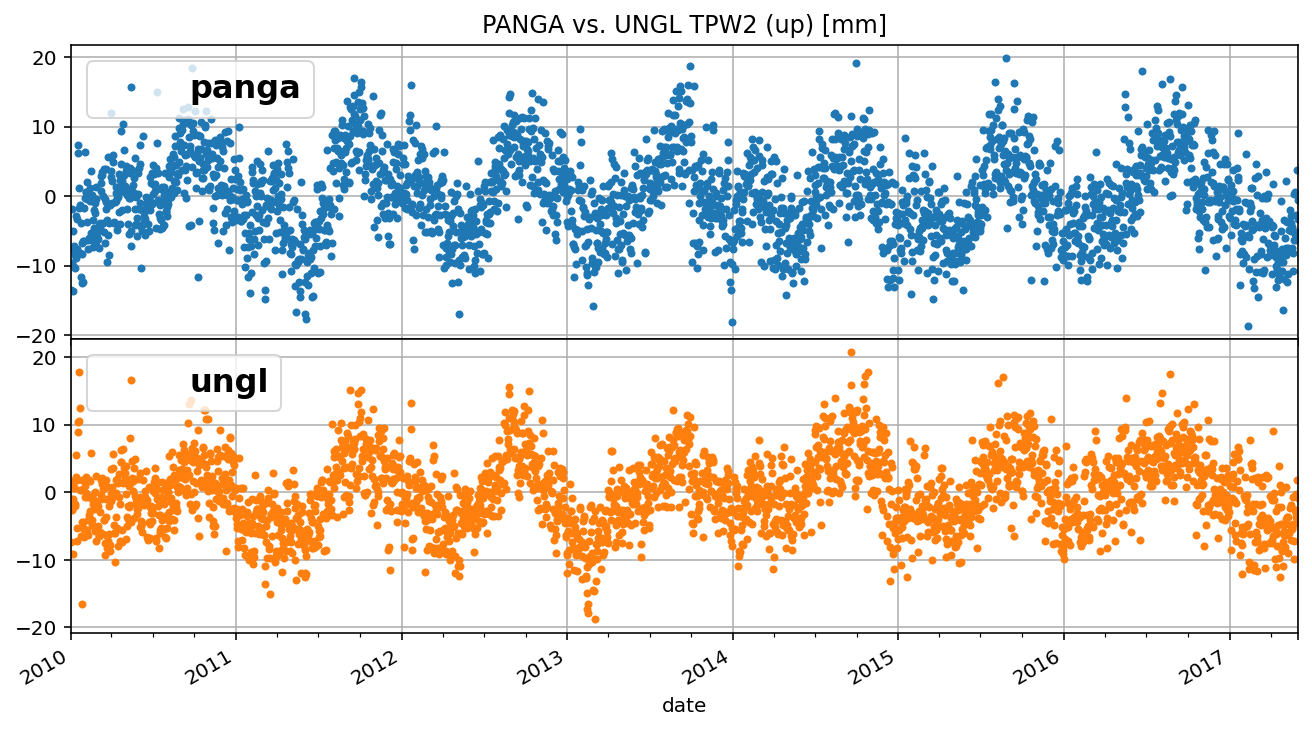

In [6]:
# Subtract mean from component to compare on same plot
#comp = 'east'
#comp = 'north'
comp = 'up'

# crop to target date range
tmp1 = df1['2010/01/01':'2017/06/01']#specific time range
tmp2 = df2['2010/01/01':'2017/06/01']

# subtract mean
pangaData = tmp1[comp] - tmp1[comp].mean()
unglData = tmp2[comp] - tmp2[comp].mean()

df = pd.DataFrame(dict(panga=pangaData)) 
df['ungl'] = unglData    
axes = df.plot(subplots=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    #ax.legend(loc='upper left', frameon=True, fontsize='large')
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp));
#print(df.describe())


Rate [mm/yr]=8.805367895766834
Rate [mm/yr]=8.533338642099544


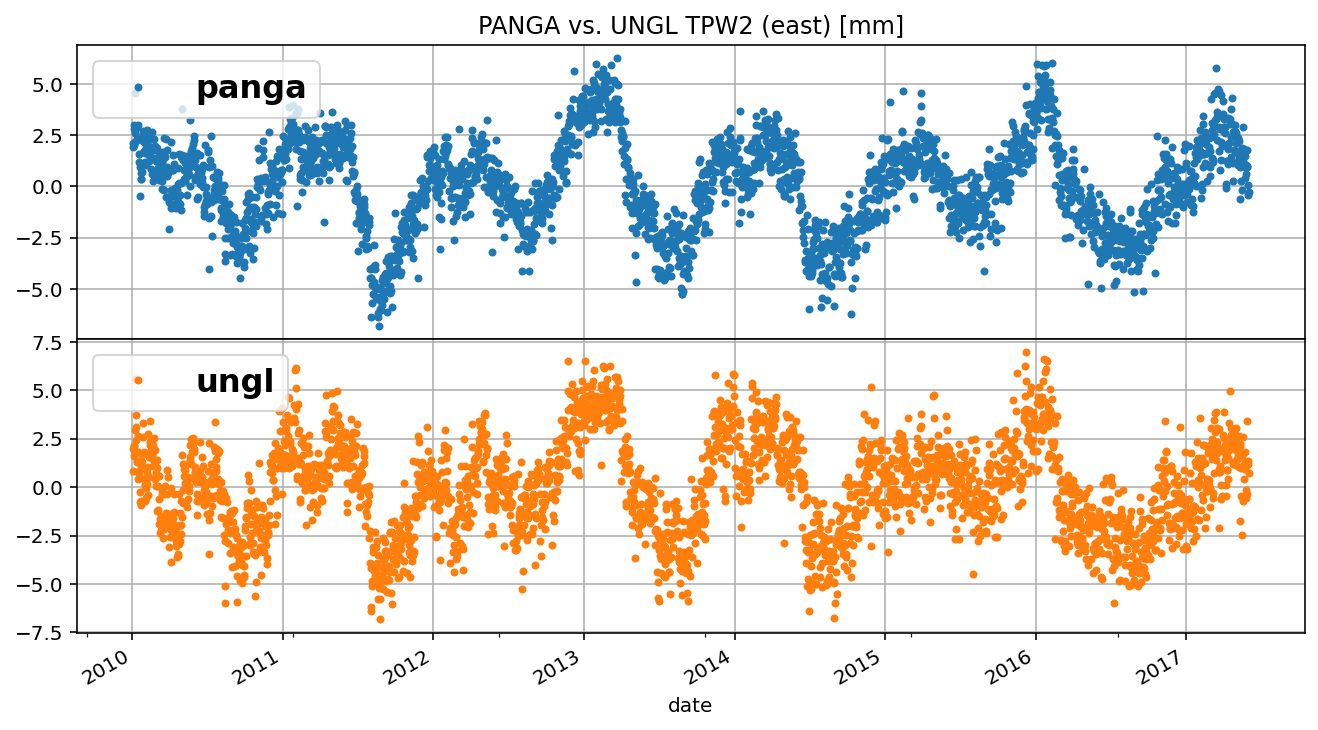

In [7]:
# Subtract mean from component to compare on same plot
comp = 'east'
#comp = 'north'
#comp = 'up'

# crop to target date range
tmp1 = df1['2010/01/01':'2017/06/01'].copy() #specific time range
tmp2 = df2['2010/01/01':'2017/06/01'].copy()

# linear detrend 
# Ensure no nans in time series
tmp1 = tmp1.dropna()
tmp1 = gps.analysis.detrend(tmp1, comp)
pangaData = tmp1['detrend']
tmp2 = gps.analysis.detrend(tmp2, comp)
unglData = tmp2['detrend']

df = pd.DataFrame(dict(panga=pangaData)) 
df.loc[:,'ungl'] = unglData

axes = df.plot(subplots=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp));
#print(df.describe())



Rate [mm/yr]=7.532273241227482
Rate [mm/yr]=9.04133633471187


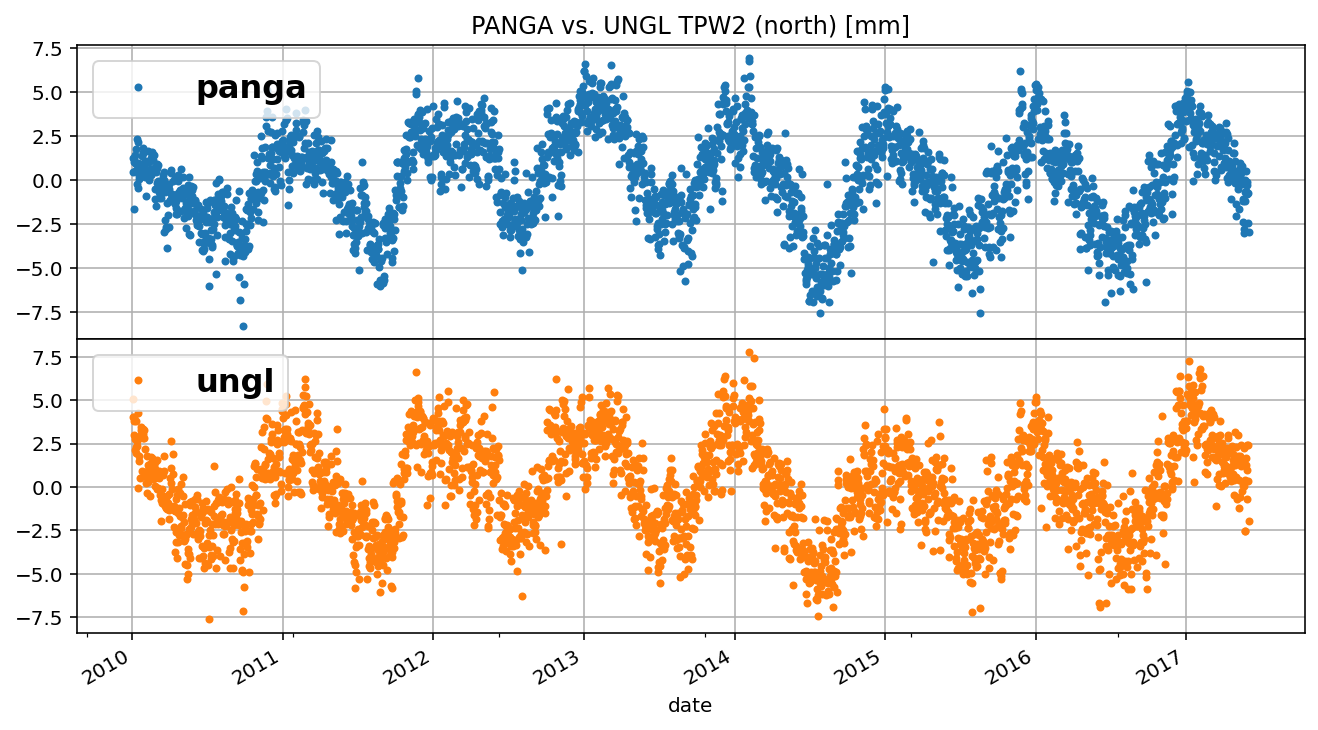

In [8]:
# Subtract mean from component to compare on same plot
#comp = 'east'
comp = 'north'
#comp = 'up'

# crop to target date range
tmp1 = df1.loc['2010/01/01':'2017/06/01'].copy()
tmp2 = df2.loc['2010/01/01':'2017/06/01'].copy()

# linear detrend 
# Ensure no nans in time series
tmp1 = tmp1.dropna()
tmp1 = gps.analysis.detrend(tmp1, comp)
pangaData = tmp1['detrend']
tmp2 = gps.analysis.detrend(tmp2, comp)
unglData = tmp2['detrend']

df = pd.DataFrame(dict(panga=pangaData)) 
df.loc[:,'ungl'] = unglData

axes = df.plot(subplots=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp));
#print(df.describe())

